# Import librery

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Import dataset

In [2]:
df = pd.read_csv("day.csv")
df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

### Map categorical variable
##### season--> 1:spring,2:summer,3:fall,4:winter
##### weathersit--> 1:clear,2:cloudy,3:light_rain

In [5]:
df['season'] = df[['season']].apply(lambda x : x.map({1:'spring',2:'summer',3:'fall',4:'winter'}))
df['weathersit'] = df[['weathersit']].apply(lambda x : x.map({1:'clear',2:'cloudy',3:'light_rain'}))

In [6]:
df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


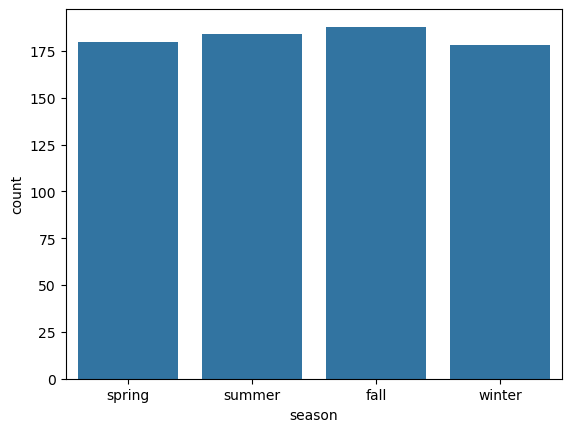

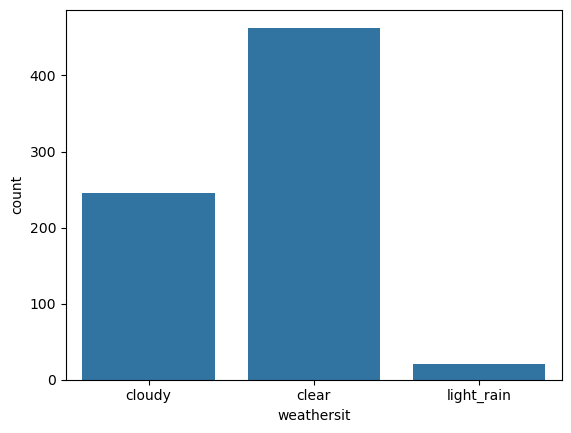

In [7]:
for col in ['season','weathersit']:
    sns.countplot(x=df[col])
    plt.show()

#### Drop Variables
Dropping instant, casual and registered variables as these are not feature variables and dont add any value to dataset, also dropping dtedat as this variable get covered by yr, mnth variables

In [8]:
df = df.drop(['instant','dteday','casual','registered'],axis = 1)

In [9]:
df.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,6.526027,0.028767,2.997260,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,3.450215,0.167266,2.006161,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,1.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,4.000000,0.000000,1.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,7.000000,0.000000,3.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,10.000000,0.000000,5.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,12.000000,1.000000,6.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 68.6+ KB


### Check for null values

In [11]:
df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

#### Create dummy variables for categorical variables

In [12]:
season_dummy = pd.get_dummies(df.season, drop_first = True, dtype = np.int64)
weather_dummy = pd.get_dummies(df.weathersit, drop_first = True, dtype = np.int64)

In [13]:
df = pd.concat([df,season_dummy,weather_dummy], axis = 1)

In [14]:
df = df.drop(['season','weathersit'],axis = 1)
df.head(5)

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,cloudy,light_rain
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,1,0
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,1,0
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0


## EDA
#### Univariate analysis

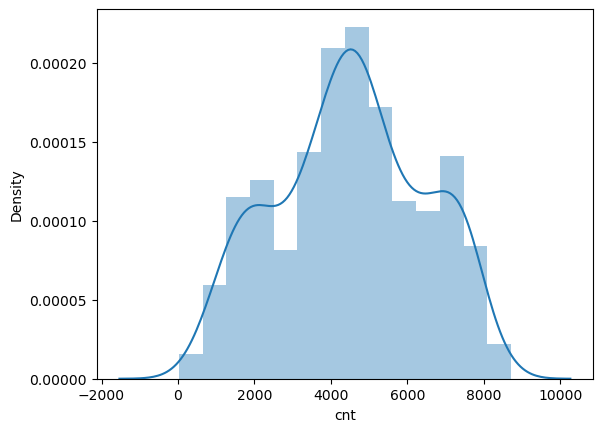

In [15]:
sns.distplot(df.cnt)
plt.show()

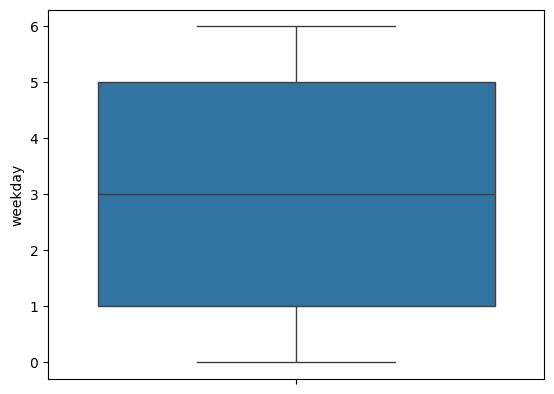

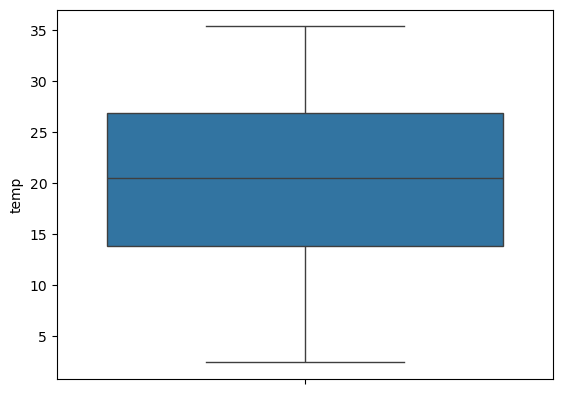

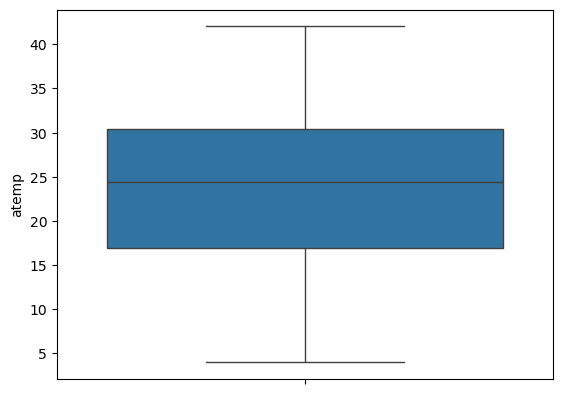

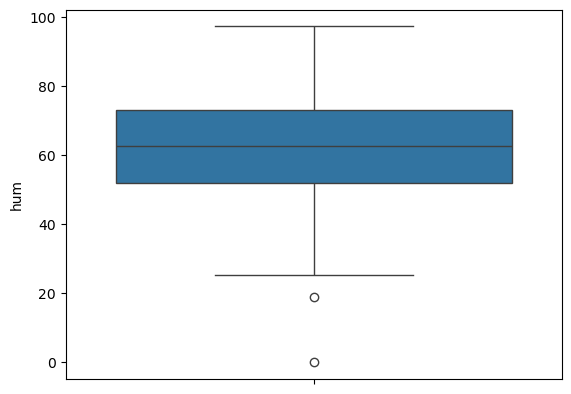

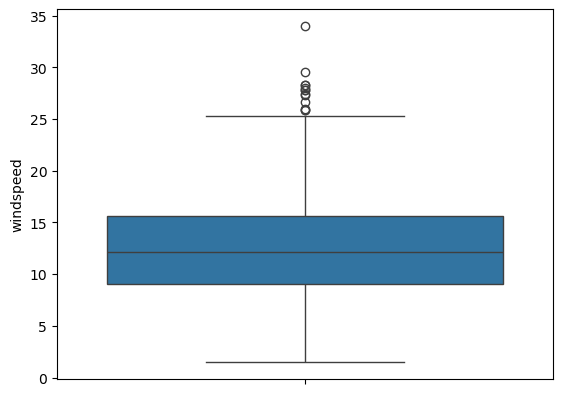

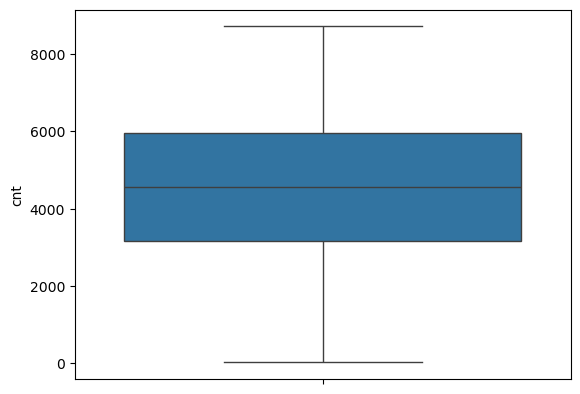

In [16]:
num_col = ['weekday','temp','atemp','hum','windspeed','cnt']
for col in num_col:
    sns.boxplot(df[col])
    plt.show()

In [17]:
#Removing rows from dataframe with windspeed value above 25(outliers)
df = df[df["windspeed"]<25]

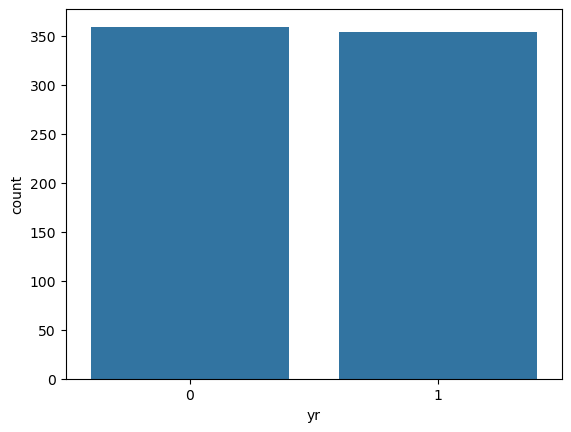

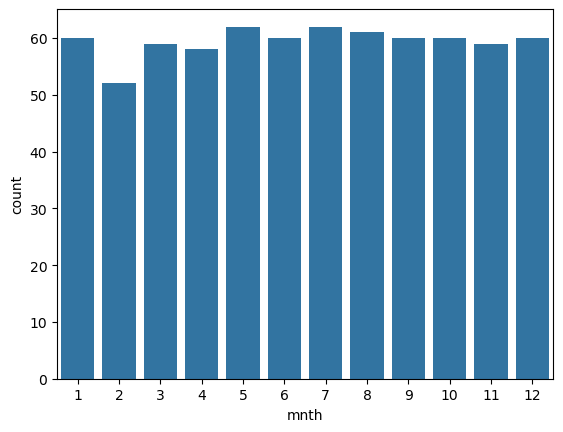

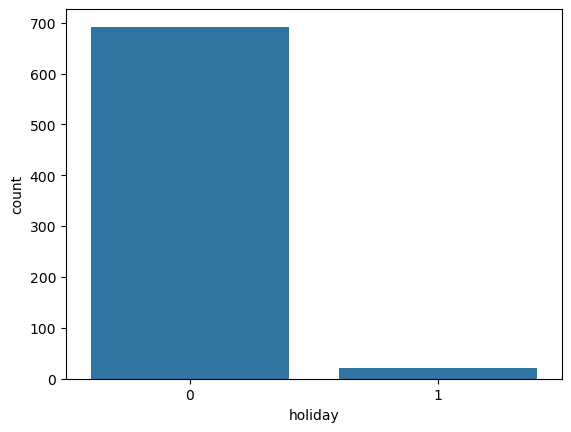

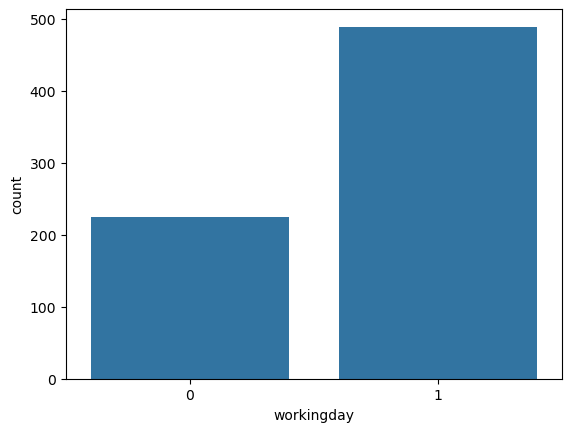

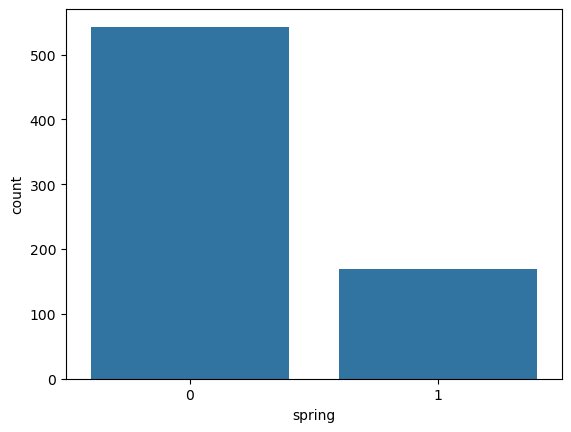

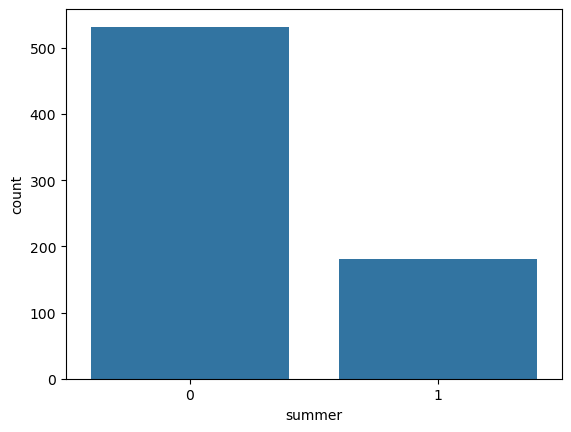

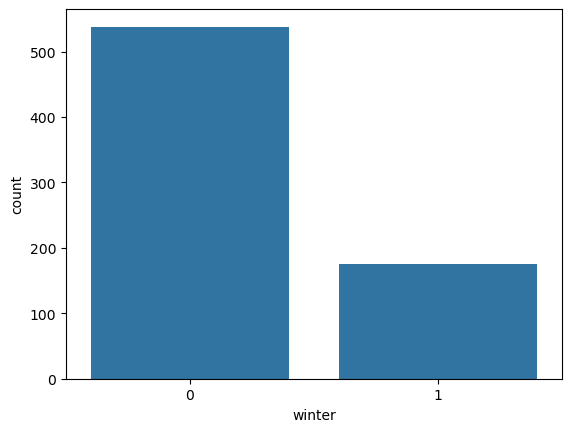

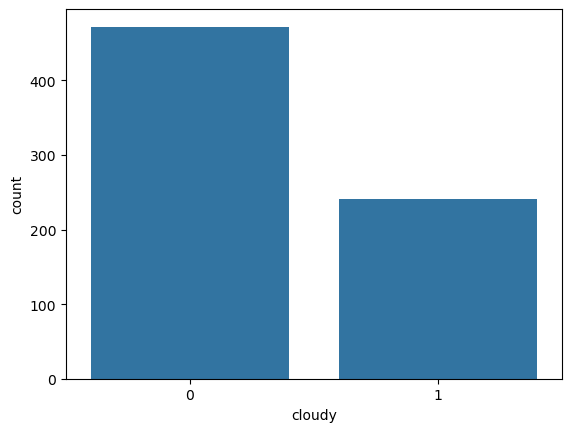

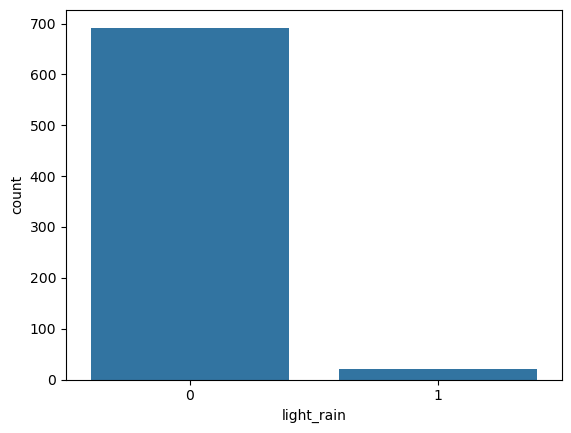

In [18]:
cat_col = ['yr','mnth','holiday','workingday','spring','summer','winter','cloudy','light_rain']
for col in cat_col:
    sns.countplot(x=df[col])
    plt.show()

#### Bivariate analysis

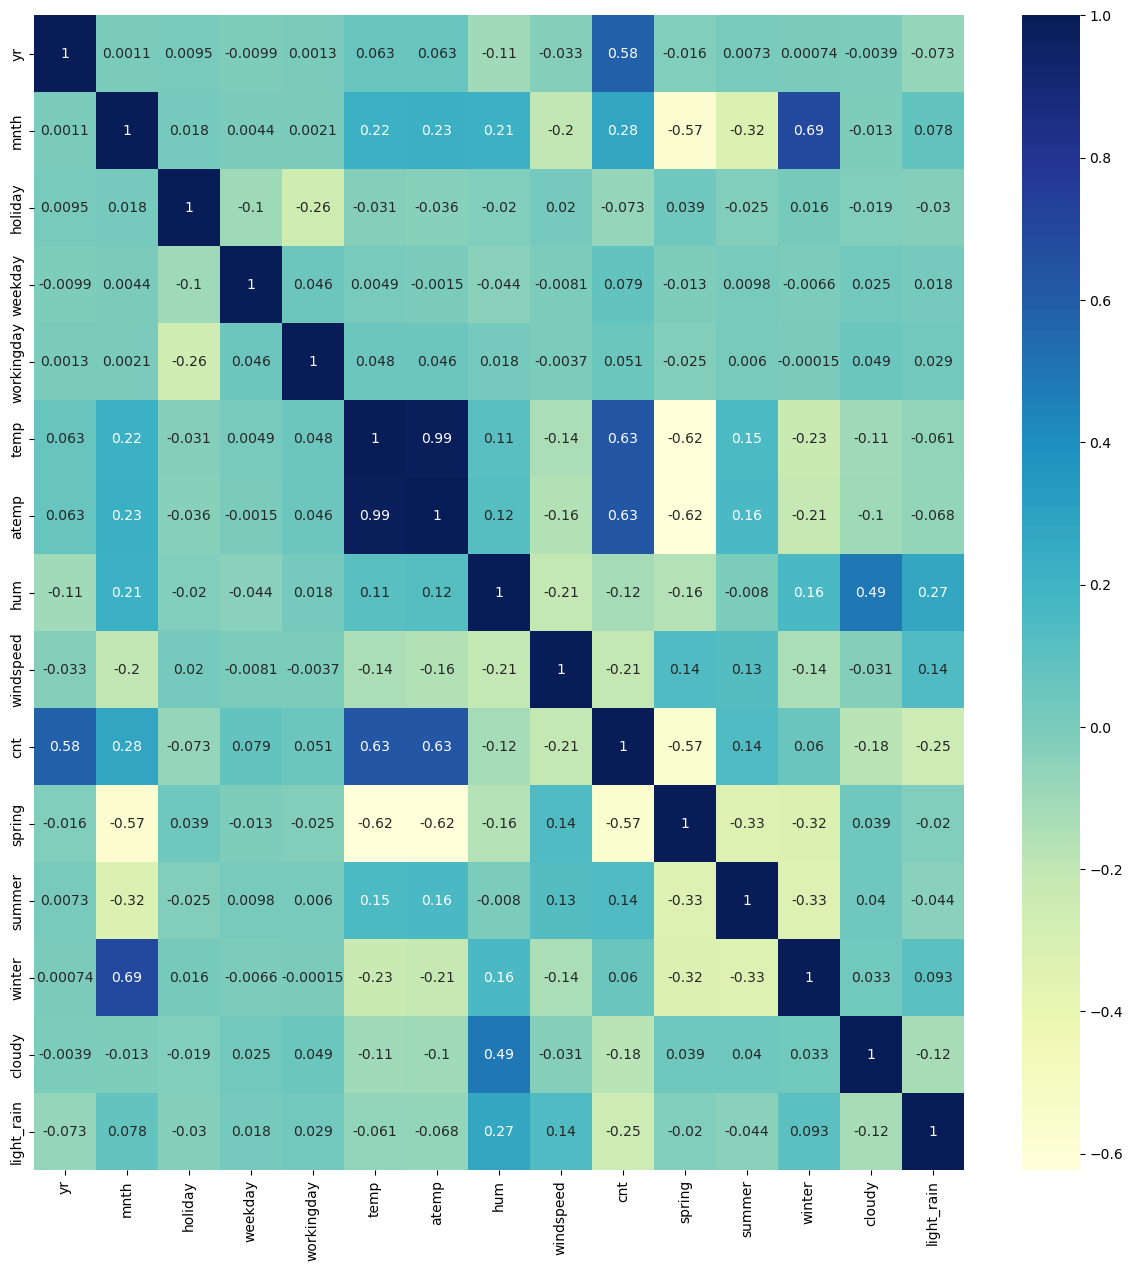

In [19]:
# Heatmap to find correlation
plt.figure(figsize = (15, 15))

sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

#### temp shows high correlation with cnt 

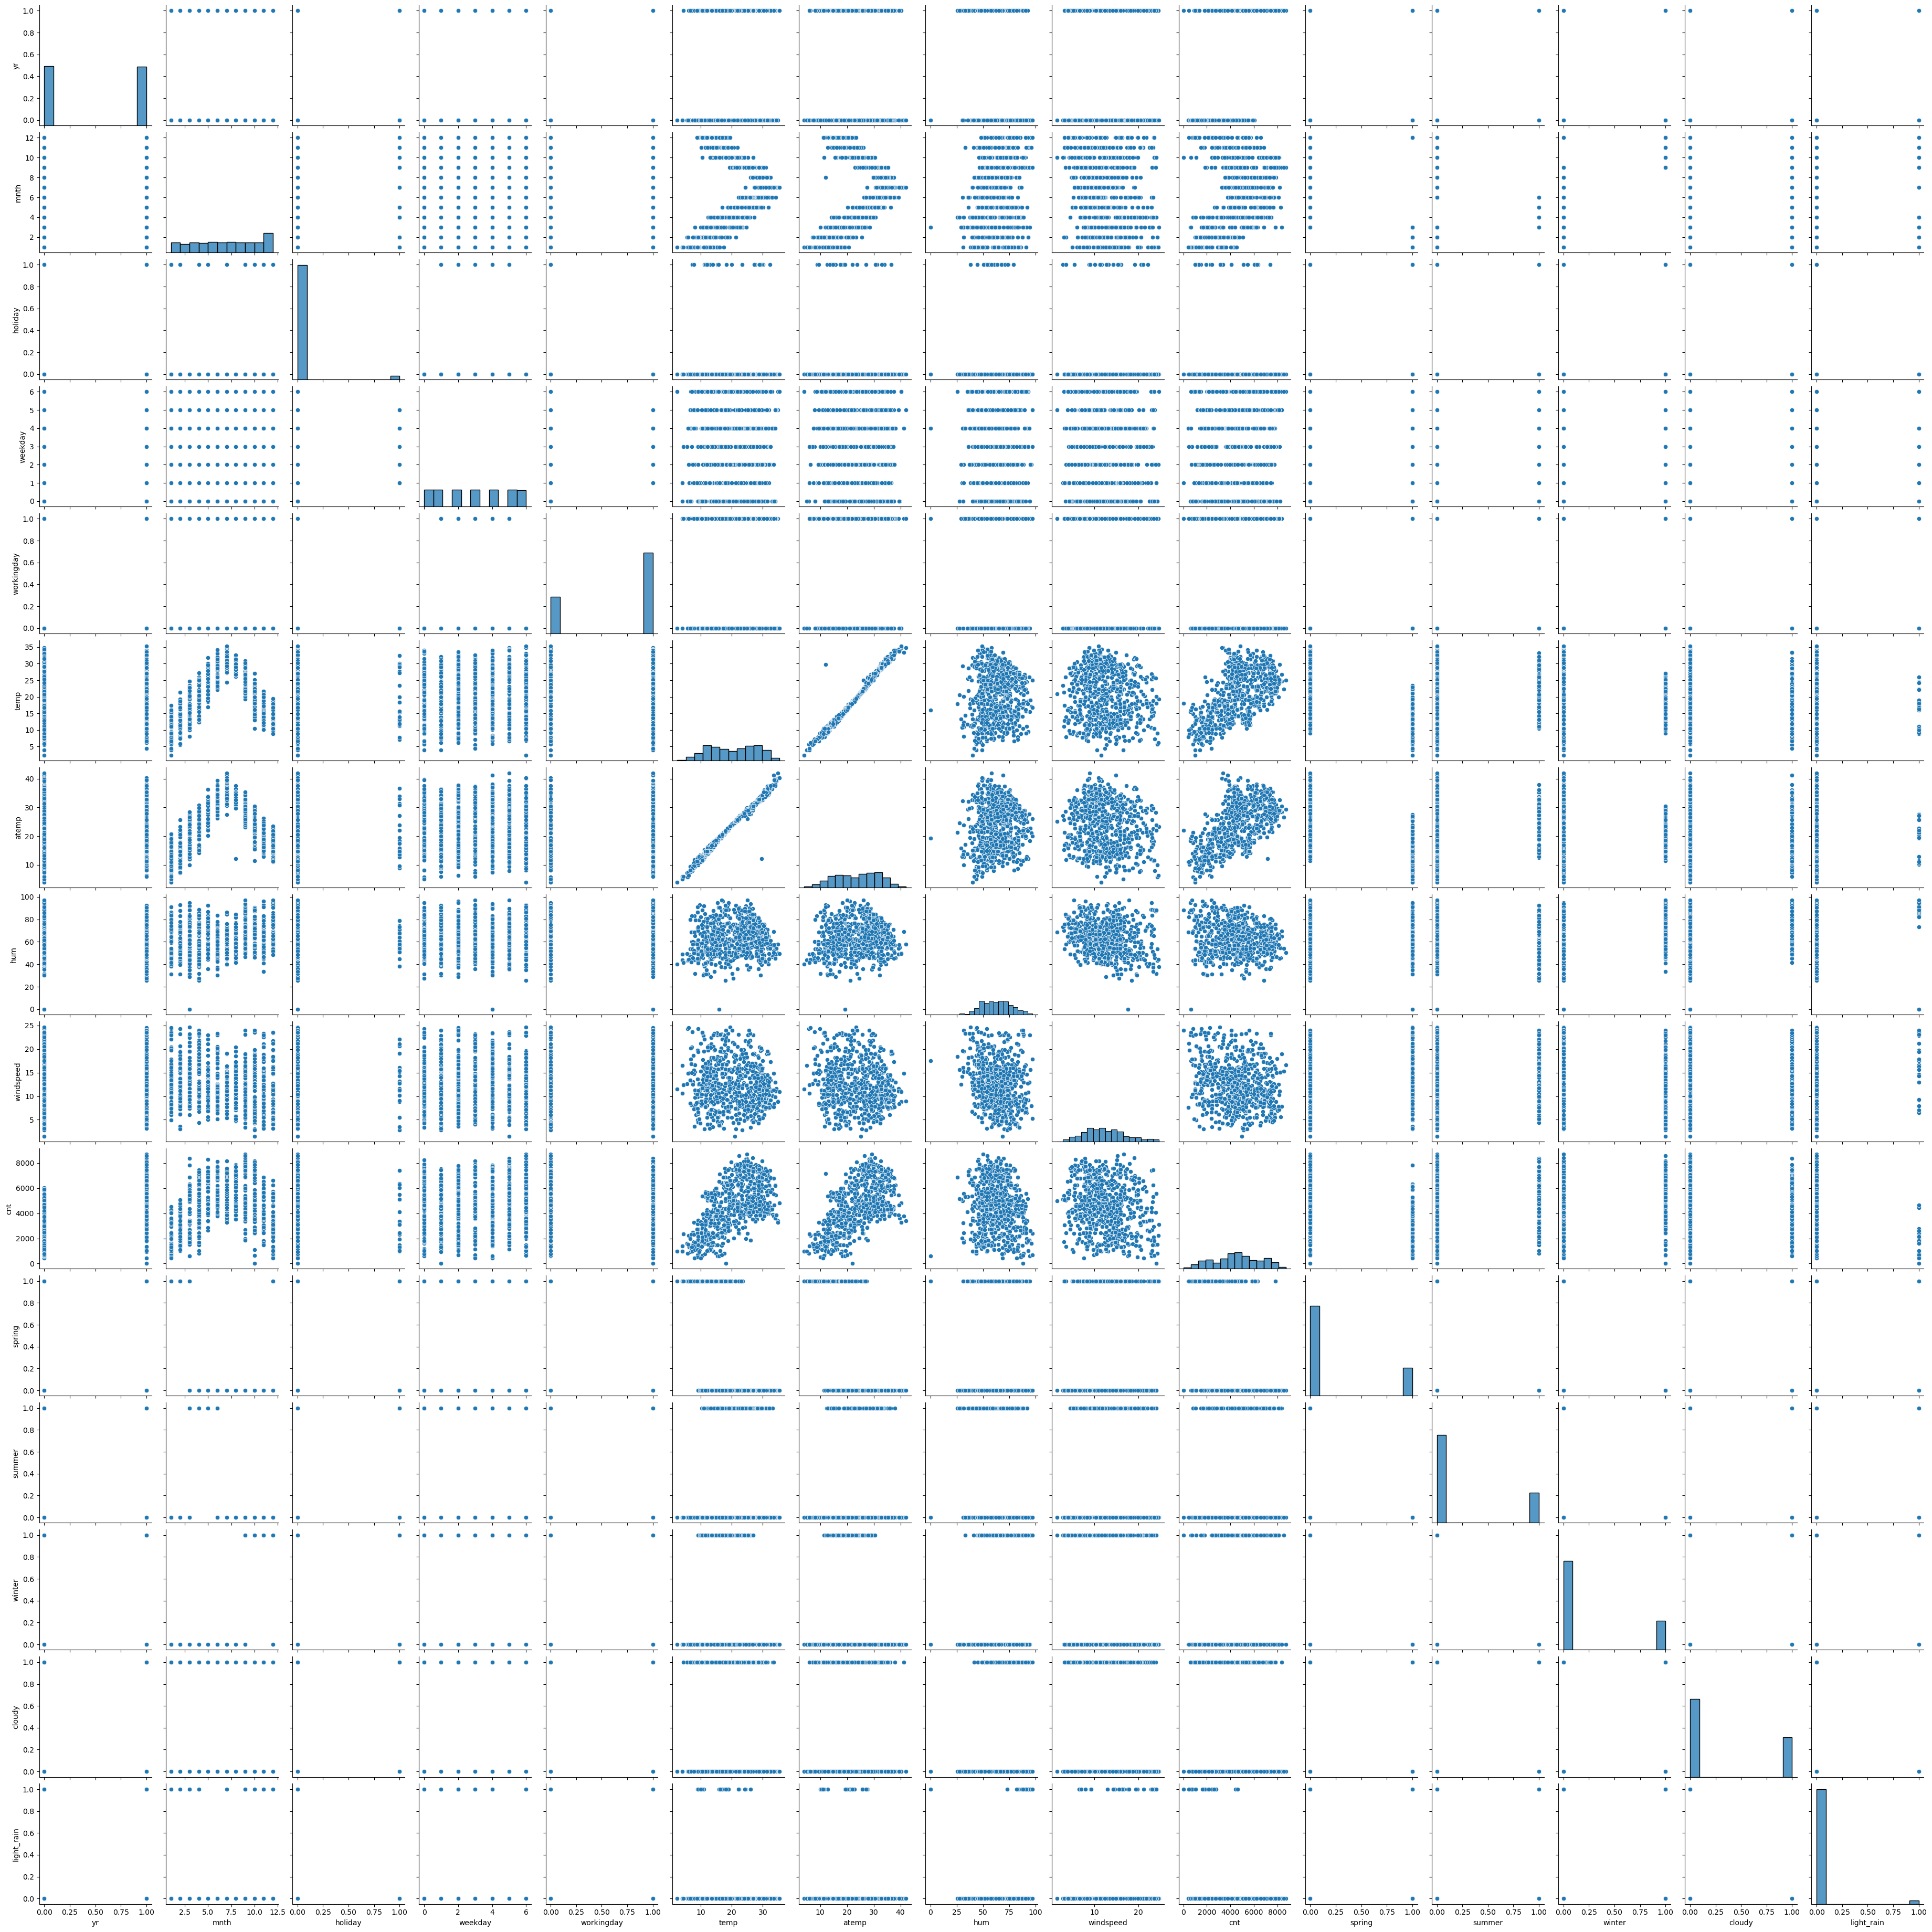

In [20]:
sns.pairplot(df)
plt.show()

#### From pair plot we can validate that temp has linear relation with cnt

<Figure size 800x300 with 0 Axes>

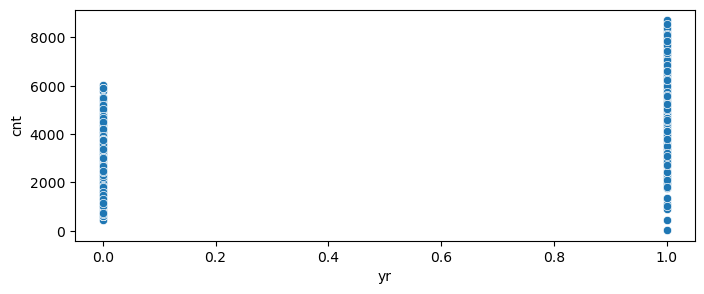

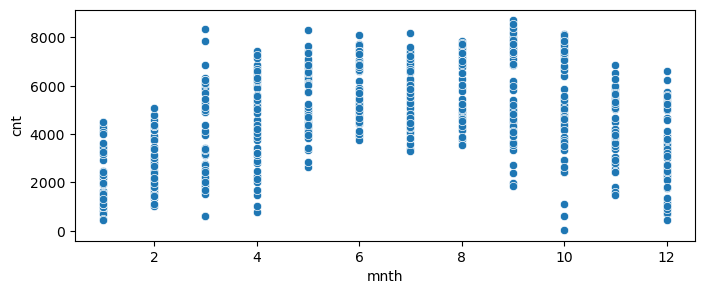

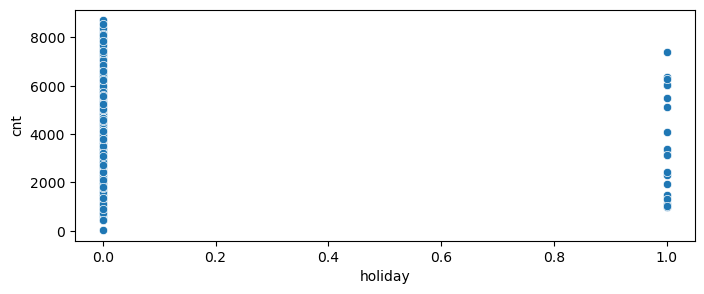

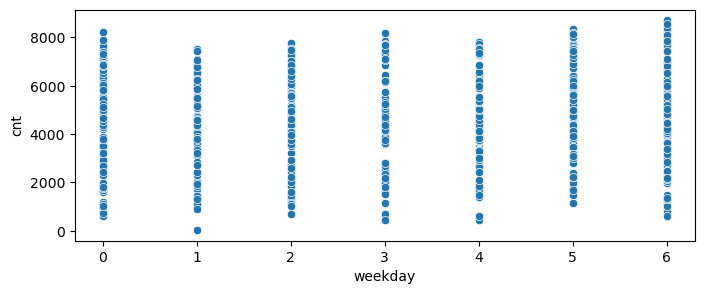

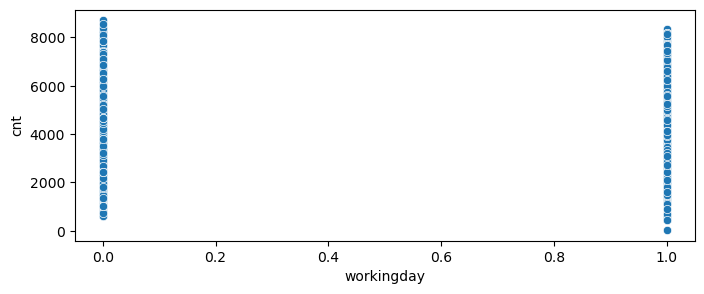

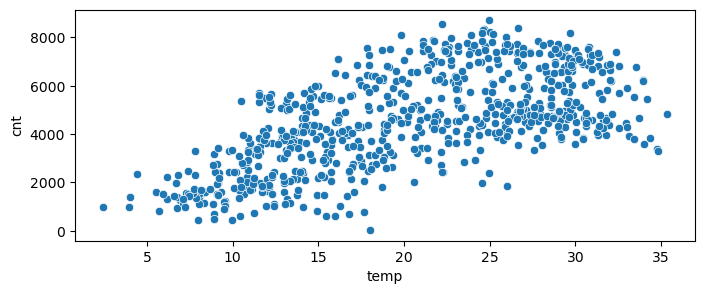

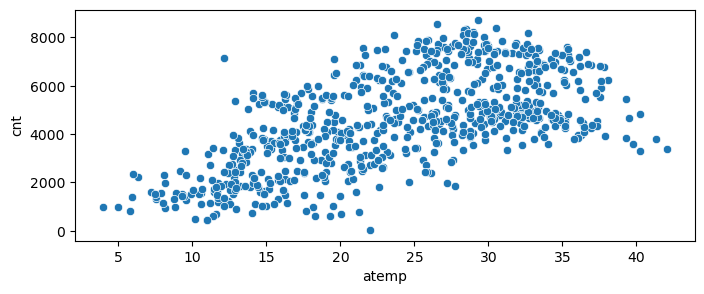

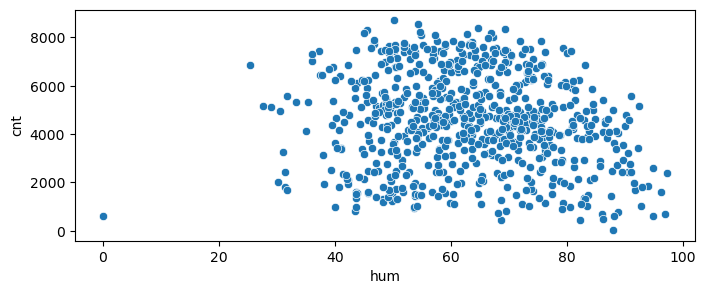

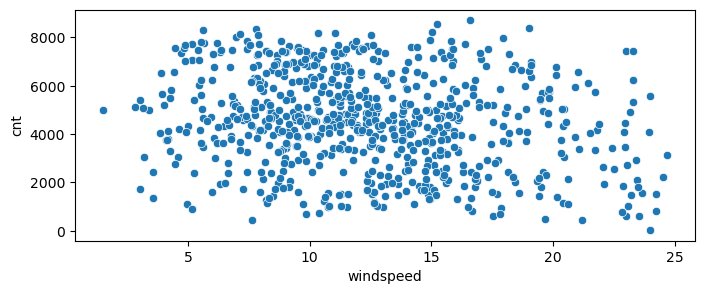

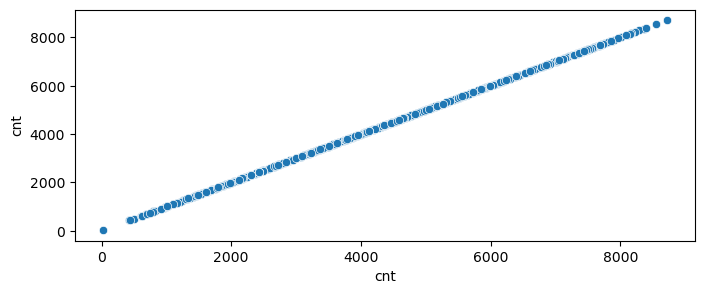

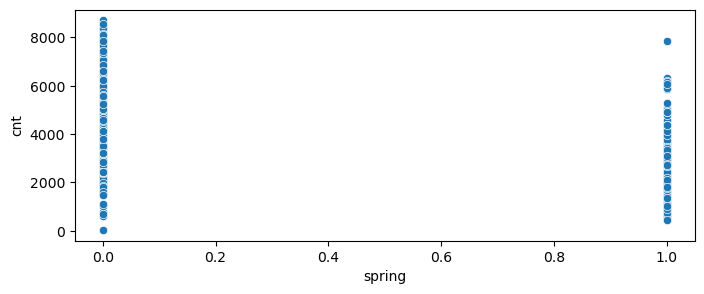

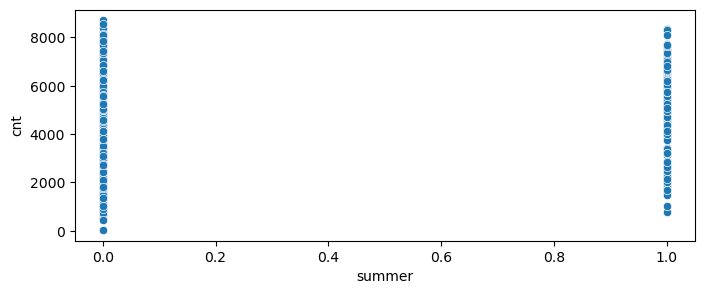

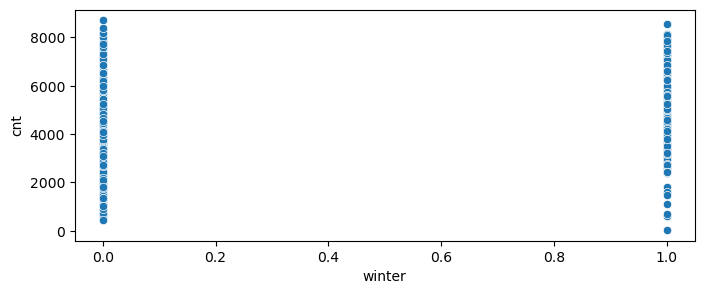

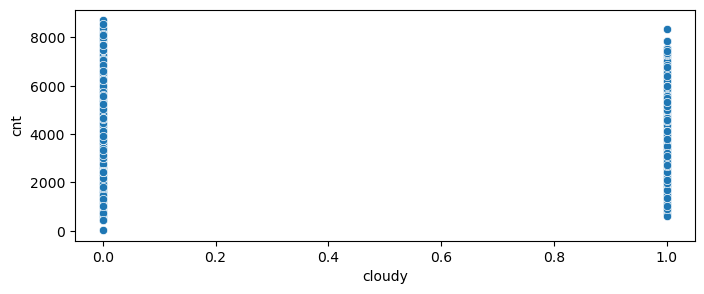

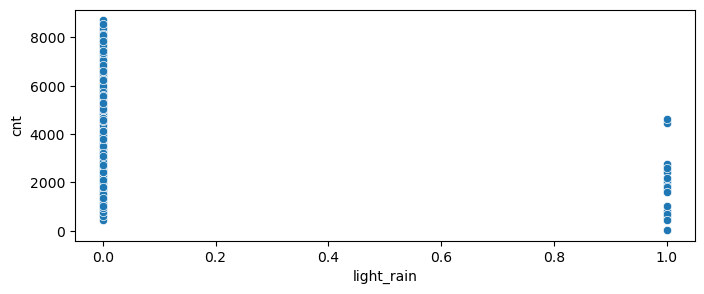

In [21]:
# Create a scatter plot of 'cnt' versus independent variables
plt.figure(figsize = (8, 3))

fignum = 0
for featurename in df.columns:
    if df[featurename].dtype !='object':
        plt.figure(figsize = (8, 3))
        sns.scatterplot(data = df, x = featurename, y = 'cnt');

In [22]:
# dropping 'windspeed' and 'hum' variable as there is we dont see any relation between these variables and target variabel 'cnt'
df = df.drop(['windspeed','hum'],axis = 1)

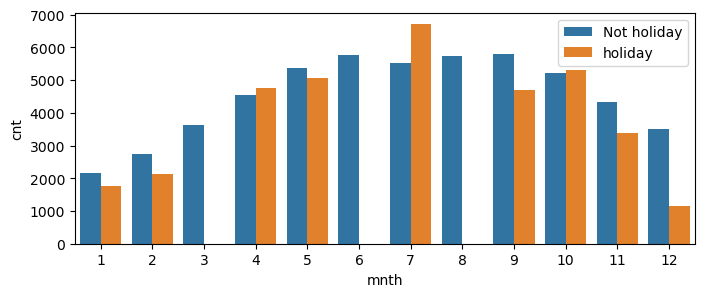

In [23]:
# Create a bar plot corresponding to the pivot table above
plt.figure(figsize = (8, 3))
sns.barplot(data = df, x = 'mnth', y = 'cnt', hue = 'holiday', ci = None)
plt.legend(['Not holiday','holiday'], loc = 'best', bbox_to_anchor = (1, 1));

#### It looks like count is dropping in winter months (December, January and February)

In [24]:
df.nunique()

yr              2
mnth           12
holiday         2
weekday         7
workingday      2
temp          493
atemp         675
cnt           681
spring          2
summer          2
winter          2
cloudy          2
light_rain      2
dtype: int64

### Split train and test set

In [25]:
df_train, df_test = train_test_split(df, random_state=100, test_size=0.3)
print(df_train.shape)
print(df_test.shape)

(499, 13)
(214, 13)


In [26]:
#Import MinMaxScaler function for scaling variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_var = ['yr','mnth','holiday','weekday','workingday','temp','atemp','cnt']
df_train[num_var] = scaler.fit_transform(df_train[num_var])
df_train.head(5)

,yr,mnth,holiday,weekday,workingday,temp,atemp,cnt,spring,summer,winter,cloudy,light_rain
423,1.0,0.090909,0.0,0.333333,1.0,0.379776,0.378446,0.499425,1,0,0,0,0
728,1.0,1.000000,0.0,0.000000,0.0,0.248979,0.210462,0.204096,1,0,0,0,0
480,1.0,0.272727,0.0,0.666667,1.0,0.555927,0.557782,0.575702,0,1,0,1,0
115,0.0,0.272727,0.0,0.333333,1.0,0.724696,0.710150,0.503682,0,1,0,0,0
581,1.0,0.636364,0.0,0.000000,0.0,0.898739,0.899054,0.626093,0,0,0,0,0


In [27]:
df_train.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,cnt,spring,summer,winter,cloudy,light_rain
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,0.511022,0.510293,0.032064,0.494322,0.685371,0.548120,0.540193,0.518044,0.234469,0.242485,0.256513,0.342685,0.036072
std,0.500380,0.314822,0.176347,0.333201,0.464834,0.232881,0.224979,0.225129,0.424092,0.429016,0.437146,0.475084,0.186657
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.272727,0.000000,0.166667,0.000000,0.343384,0.341017,0.368040,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.545455,0.000000,0.500000,1.000000,0.555927,0.557782,0.523240,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.818182,0.000000,0.833333,1.000000,0.756340,0.731475,0.692591,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
y_train = df_train.pop('cnt')
X_train = df_train

## Model

In [29]:
from sklearn.feature_selection import RFE

lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,n_features_to_select=10)
rfe = rfe.fit(X_train,y_train)

In [30]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('mnth', True, 1),
 ('holiday', True, 1),
 ('weekday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('spring', True, 1),
 ('summer', False, 2),
 ('winter', True, 1),
 ('cloudy', True, 1),
 ('light_rain', True, 1)]

In [31]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'mnth', 'holiday', 'weekday', 'temp', 'atemp', 'spring', 'winter',
       'cloudy', 'light_rain'],
      dtype='object')

In [32]:
X_train.columns[~rfe.support_]

Index(['workingday', 'summer'], dtype='object')

#### RFE - Automated feature selection
Taking in consideration threshhold value for p-value as 0.05

In [33]:
# considering rfe_support columns only for model 
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)

In [34]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [35]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     233.2
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          9.06e-179
Time:                        22:31:18   Log-Likelihood:                 474.20
No. Observations:                 499   AIC:                            -926.4
Df Residuals:                     488   BIC:                            -880.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1679      0.024      7.137      0.0

In [36]:
#Drop 'atemp' varaibale as p-value is higher (greater thab 0.05)
X_train_new = X_train_rfe.drop(['atemp'],axis = 1)

In [37]:
X_train_new = sm.add_constant(X_train_new)

In [38]:
lm = sm.OLS(y_train,X_train_new).fit()

In [39]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     258.8
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          1.05e-179
Time:                        22:31:18   Log-Likelihood:                 473.53
No. Observations:                 499   AIC:                            -927.1
Df Residuals:                     489   BIC:                            -884.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1707      0.023      7.289      0.0

In [40]:
#Drop 'atemp' varaibale as p-value is higher (greater thab 0.05)
X_train_new = X_train_new.drop(['mnth'],axis = 1)

lm = sm.OLS(y_train,X_train_new).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     290.3
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          1.72e-180
Time:                        22:31:18   Log-Likelihood:                 472.45
No. Observations:                 499   AIC:                            -926.9
Df Residuals:                     490   BIC:                            -889.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1623      0.023      7.143      0.0

#### No Autocorrelation in residuals as Durbin-Watson gives us value close to 2

### VIF
Calculate VIF for the model, considering threshold for VIF as 5.

In [41]:
#importing VIF library
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i ) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,28.71
5,spring,2.54
4,temp,2.47
6,winter,1.73
7,cloudy,1.04
8,light_rain,1.04
1,yr,1.02
2,holiday,1.02
3,weekday,1.02


In [42]:
X_train_new_lm = X_train_new.drop(['const'], axis = 1)

In [43]:
# Predicting count value on train test using trained model
y_train_pred  = lm.predict(X_train_new)

<Axes: ylabel='Density'>

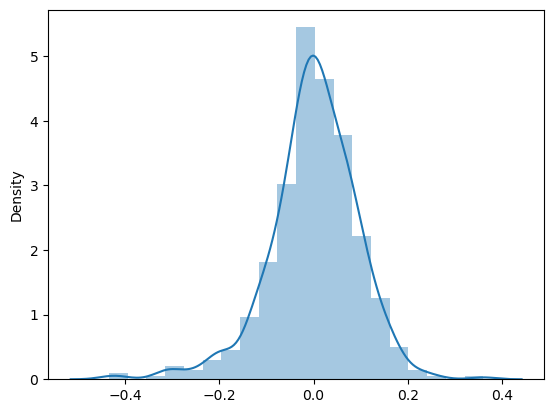

In [44]:
#plotting error term to check distribution
fig = plt.figure()
sns.distplot((y_train-y_train_pred), bins = 20)


##### **Assumption** that Error terms are normally distributed, is validated by plot above

### Prepare Test set

In [45]:
#transform test set using train set scaler
df_test[num_var] = scaler.transform(df_test[num_var])
df_test.head(5)

,yr,mnth,holiday,weekday,workingday,temp,atemp,cnt,spring,summer,winter,cloudy,light_rain
585,1.0,0.636364,0.0,0.666667,1.0,0.881861,0.855521,0.835711,0,0,0,0,0
592,1.0,0.636364,0.0,0.666667,1.0,0.835451,0.793718,0.872411,0,0,0,0,0
293,0.0,0.818182,0.0,0.833333,1.0,0.466269,0.475066,0.492637,0,0,1,0,0
156,0.0,0.454545,0.0,0.166667,1.0,0.783764,0.748449,0.520709,0,1,0,0,0
453,1.0,0.181818,0.0,0.833333,1.0,0.393488,0.408914,0.625518,0,1,0,1,0


In [46]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.head(5)

,yr,mnth,holiday,weekday,workingday,temp,atemp,spring,summer,winter,cloudy,light_rain
585,1.0,0.636364,0.0,0.666667,1.0,0.881861,0.855521,0,0,0,0,0
592,1.0,0.636364,0.0,0.666667,1.0,0.835451,0.793718,0,0,0,0,0
293,0.0,0.818182,0.0,0.833333,1.0,0.466269,0.475066,0,0,1,0,0
156,0.0,0.454545,0.0,0.166667,1.0,0.783764,0.748449,0,1,0,0,0
453,1.0,0.181818,0.0,0.833333,1.0,0.393488,0.408914,0,1,0,1,0


In [47]:
X_test_new = X_test[X_train_new_lm.columns]
X_test_new = sm.add_constant(X_test_new)

In [48]:
# Predicting count value for test set on model trainned using train set
y_pred = lm.predict(X_test_new)

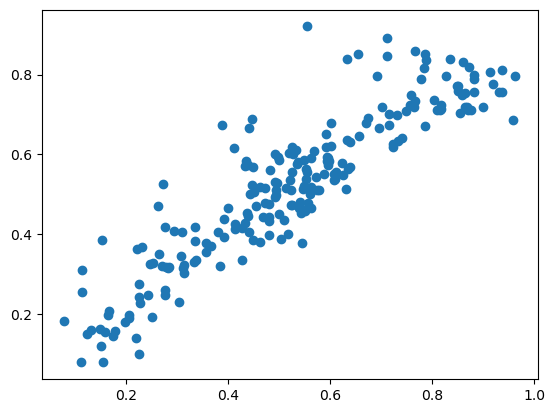

In [49]:
plt.scatter(y_test,y_pred)
plt.show()

##### **Assumption** that Error terms have constant variance is validatated by plot above, as error terms are not scattered to far.

### Residual analysis
#### R-squared score

In [50]:
print('train set score :', r2_score(y_train, y_train_pred))
print('test set score :', r2_score(y_test, y_pred))

train set score : 0.8257563056292091
test set score : 0.8120161399092054


Model fits well with test set as well, with 81% accuracy